In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.layers import Bidirectional
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
from keras.initializers import Orthogonal
from keras_tuner import HyperParameters
from keras.regularizers import l2
from sklearn.model_selection import TimeSeriesSplit
from keras.models import clone_model
from sklearn.metrics import mean_squared_error

Converting the dataset format to "csv" 

In [2]:
excel_file_path = '/Users/amalshar/Desktop/IIT/4th Year/FYP Implementation/Data/Apparel_Sales_Data.xlsx'
csv_output_path = '/Users/amalshar/Desktop/IIT/4th Year/FYP Implementation/Data/Apparel_Sales_Data.csv'

In [3]:
# Read the Excel file into a Pandas DataFrame
initial_data = pd.read_excel(excel_file_path)

# Save the DataFrame to a CSV file
initial_data.to_csv(csv_output_path, index=False)

In [4]:
file_path = '/Users/amalshar/Desktop/IIT/4th Year/FYP Implementation/Data/Apparel_Sales_Data.csv'
df = pd.read_csv(file_path)

In [5]:
df.to_csv('/Users/amalshar/Desktop/IIT/4th Year/FYP Implementation/Data/Apparel_Sales_Data.csv', index=False)

Data Preprocessing

In [6]:
# Load dataset
df = pd.read_csv('/Users/amalshar/Desktop/IIT/4th Year/FYP Implementation/Data/Apparel_Sales_Data.csv')

Data Exploration

In [7]:
# Examine data
df.head()
df.info()
df.isnull().sum().sort_values(ascending=False)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20674 entries, 0 to 20673
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer Order            20674 non-null  int64  
 1   Dist.Chl.Name             20674 non-null  object 
 2   Material Group            20674 non-null  object 
 3   FG Type                   20674 non-null  object 
 4   FG Type Desc.             20674 non-null  object 
 5   Construction              20674 non-null  object 
 6   Fabrication               20674 non-null  object 
 7   Design Source             20674 non-null  object 
 8   Business Source           20674 non-null  object 
 9   Customer Group            20674 non-null  object 
 10  Customer                  20674 non-null  object 
 11  Gender                    20674 non-null  object 
 12  Global Style              20668 non-null  object 
 13  FG SKU                    20668 non-null  object 
 14  Cust.C

FG SKU                      6
Global Style                6
Customer Order              0
Destination                 0
Sales Unit                  0
FOB                         0
Total FOB                   0
SO Doc.Currency             0
Req.Delivery Date           0
Size                        0
RM In Date                  0
Planned Cut Date            0
Original Ex.Factory Date    0
Revised Ex.Factory Date     0
Program Type                0
Program Type Desc.          0
Order Qty                   0
Season Year                 0
Dist.Chl.Name               0
Season                      0
Cust.Color Code             0
Gender                      0
Customer                    0
Customer Group              0
Business Source             0
Design Source               0
Fabrication                 0
Construction                0
FG Type Desc.               0
FG Type                     0
Material Group              0
Pack Qty                    0
dtype: int64

In [8]:
df.head()

,Customer Order,Dist.Chl.Name,Material Group,FG Type,FG Type Desc.,Construction,Fabrication,Design Source,Business Source,Customer Group,...,SO Doc.Currency,Destination,Req.Delivery Date,RM In Date,Planned Cut Date,Original Ex.Factory Date,Revised Ex.Factory Date,Program Type,Program Type Desc.,Pack Qty
0,867536001,Bulk,SINGLE,SING,Single,KNIT,SYNTHETIC,TECH PACK,REGULAR,Sportswear 1,...,USD,Africa,2023-05-31,2022-11-20,2022-11-27,2023-01-12,2023-05-17,R01,REGULAR,0
1,867536002,Bulk,SINGLE,SING,Single,KNIT,SYNTHETIC,TECH PACK,REGULAR,Sportswear 1,...,USD,Africa,2023-05-31,2022-11-20,2022-11-27,2023-01-12,2023-05-17,R01,REGULAR,0
2,867536003,Bulk,SINGLE,SING,Single,KNIT,SYNTHETIC,TECH PACK,REGULAR,Sportswear 1,...,USD,Africa,2023-05-31,2022-11-20,2022-11-27,2023-01-12,2023-05-17,R01,REGULAR,0
3,867536004,Bulk,SINGLE,SING,Single,KNIT,SYNTHETIC,TECH PACK,REGULAR,Sportswear 1,...,USD,Africa,2023-05-31,2022-11-20,2022-11-27,2023-01-12,2023-05-17,R01,REGULAR,0
4,867536005,Bulk,SINGLE,SING,Single,KNIT,SYNTHETIC,TECH PACK,REGULAR,Sportswear 1,...,USD,Africa,2023-05-31,2022-12-16,2022-12-23,2023-05-12,2023-05-17,R01,REGULAR,0


In [9]:
df.columns

Index(['Customer Order', 'Dist.Chl.Name', 'Material Group', 'FG Type',
       'FG Type Desc.', 'Construction', 'Fabrication', 'Design Source',
       'Business Source', 'Customer Group', 'Customer', 'Gender',
       'Global Style', 'FG SKU', 'Cust.Color Code', 'Season', 'Season Year',
       'Size', 'Order Qty', 'Sales Unit', 'FOB', 'Total FOB',
       'SO Doc.Currency', 'Destination', 'Req.Delivery Date', 'RM In Date',
       'Planned Cut Date', 'Original Ex.Factory Date',
       'Revised Ex.Factory Date', 'Program Type', 'Program Type Desc.',
       'Pack Qty'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20674 entries, 0 to 20673
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer Order            20674 non-null  int64  
 1   Dist.Chl.Name             20674 non-null  object 
 2   Material Group            20674 non-null  object 
 3   FG Type                   20674 non-null  object 
 4   FG Type Desc.             20674 non-null  object 
 5   Construction              20674 non-null  object 
 6   Fabrication               20674 non-null  object 
 7   Design Source             20674 non-null  object 
 8   Business Source           20674 non-null  object 
 9   Customer Group            20674 non-null  object 
 10  Customer                  20674 non-null  object 
 11  Gender                    20674 non-null  object 
 12  Global Style              20668 non-null  object 
 13  FG SKU                    20668 non-null  object 
 14  Cust.C

In [11]:
df.isnull().sum()

Customer Order              0
Dist.Chl.Name               0
Material Group              0
FG Type                     0
FG Type Desc.               0
Construction                0
Fabrication                 0
Design Source               0
Business Source             0
Customer Group              0
Customer                    0
Gender                      0
Global Style                6
FG SKU                      6
Cust.Color Code             0
Season                      0
Season Year                 0
Size                        0
Order Qty                   0
Sales Unit                  0
FOB                         0
Total FOB                   0
SO Doc.Currency             0
Destination                 0
Req.Delivery Date           0
RM In Date                  0
Planned Cut Date            0
Original Ex.Factory Date    0
Revised Ex.Factory Date     0
Program Type                0
Program Type Desc.          0
Pack Qty                    0
dtype: int64

In [12]:
# Check the percentage of NaN in dataset
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df['Global Style'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
FG SKU,6,0.00029
Global Style,6,0.00029
Customer Order,0,0.00000
Destination,0,0.00000
Sales Unit,0,0.00000
FOB,0,0.00000
Total FOB,0,0.00000
SO Doc.Currency,0,0.00000
Req.Delivery Date,0,0.00000
Size,0,0.00000


Visualization of Data

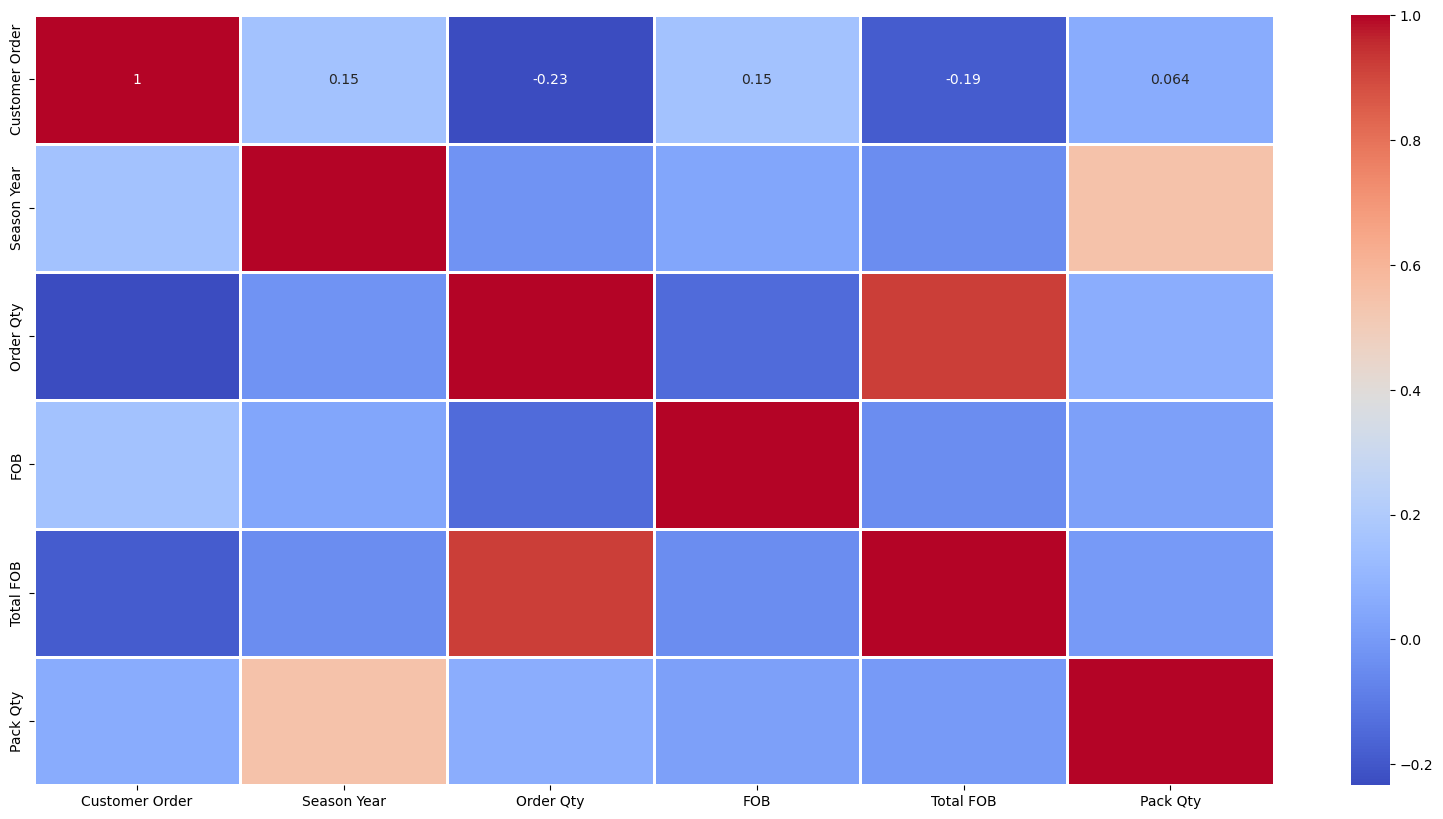

In [13]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(numeric_data.corr(), cmap='coolwarm', annot=True, linewidths=2, ax=ax)
plt.show()

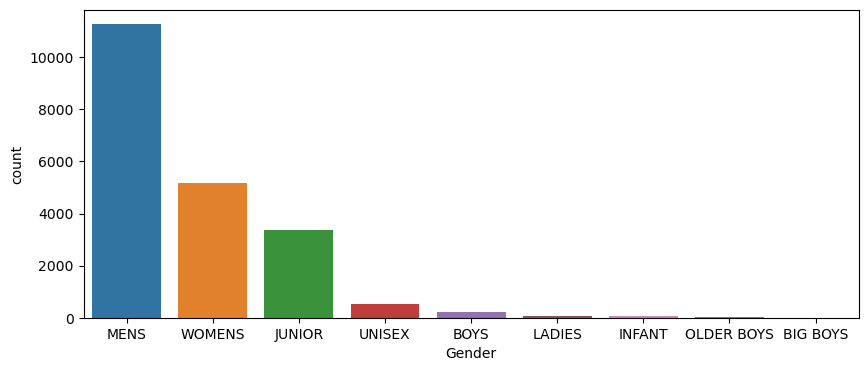

In [14]:
# Frequency of Gender
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
sns.countplot(x='Gender', data=df, order=df['Gender'].value_counts().index, ax=ax)
plt.show()

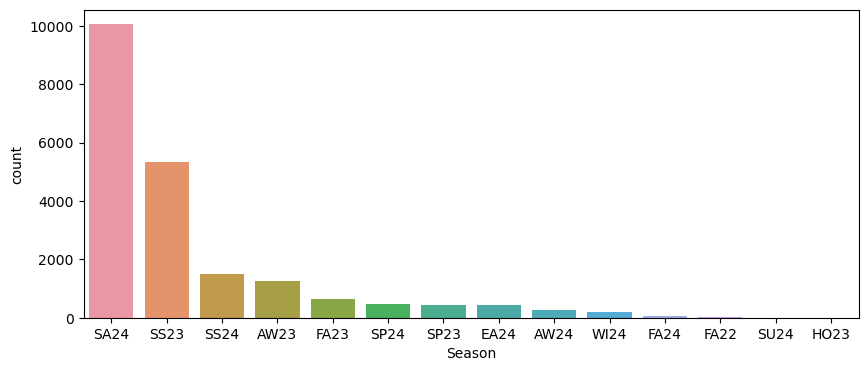

In [15]:
# Frequency of Season
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
sns.countplot(x='Season', data=df, order=df['Season'].value_counts().index, ax=ax)
plt.show()

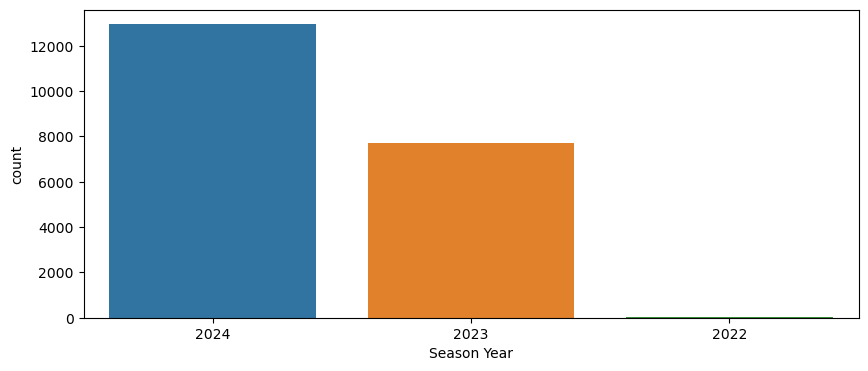

In [16]:
# Frequency of Year
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
sns.countplot(x='Season Year', data=df, order=df['Season Year'].value_counts().index, ax=ax)
plt.show()

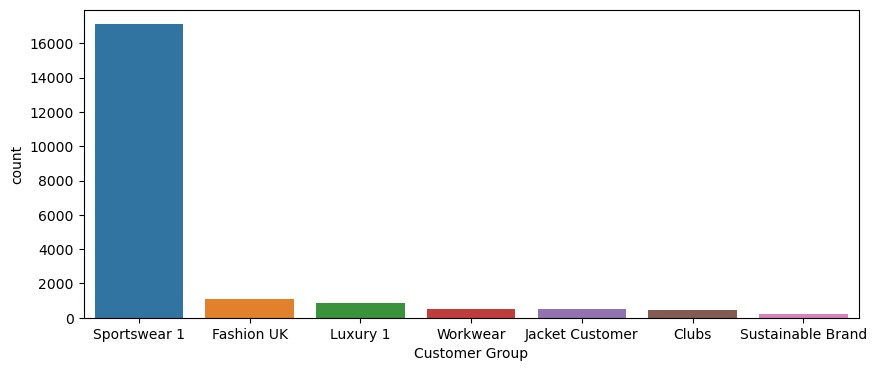

In [17]:
# Frequency of Customer Group
fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
sns.countplot(x='Customer Group', data=df, order=df['Customer Group'].value_counts().index, ax=ax)
plt.show()

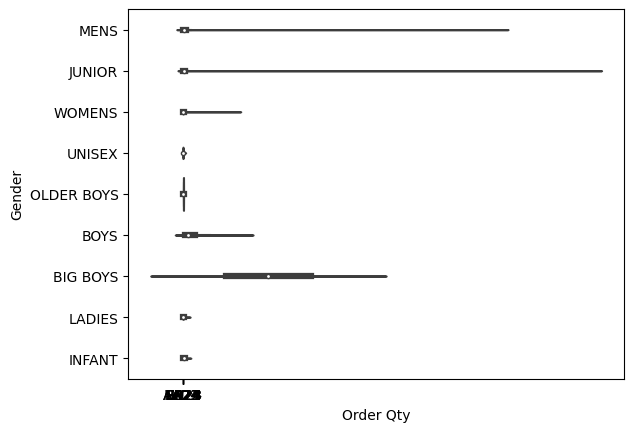

In [18]:
sns.countplot(x='Season', data=df)
sns.violinplot(x='Order Qty', y='Gender', data=df)
plt.show()

Data Cleaning

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20674 entries, 0 to 20673
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer Order            20674 non-null  int64  
 1   Dist.Chl.Name             20674 non-null  object 
 2   Material Group            20674 non-null  object 
 3   FG Type                   20674 non-null  object 
 4   FG Type Desc.             20674 non-null  object 
 5   Construction              20674 non-null  object 
 6   Fabrication               20674 non-null  object 
 7   Design Source             20674 non-null  object 
 8   Business Source           20674 non-null  object 
 9   Customer Group            20674 non-null  object 
 10  Customer                  20674 non-null  object 
 11  Gender                    20674 non-null  object 
 12  Global Style              20668 non-null  object 
 13  FG SKU                    20668 non-null  object 
 14  Cust.C

In [20]:
# Remove duplicate rows
df = df.drop_duplicates()

In [21]:
# Convert date columns to datetime objects  
    
def convert_date_into_days(df):
    df['Req.Delivery Date'] = pd.to_datetime(df['Req.Delivery Date'])
    df['RM In Date'] = pd.to_datetime(df['RM In Date'])
    df['Planned Cut Date'] = pd.to_datetime(df['Planned Cut Date'])
    df['Original Ex.Factory Date'] = pd.to_datetime(df['Original Ex.Factory Date'])
    df['Revised Ex.Factory Date'] = pd.to_datetime(df['Revised Ex.Factory Date'])

    # Feature engineering
    df['Production Lead Time'] = (df['Original Ex.Factory Date'] - df['Planned Cut Date']).dt.days
    df['Revised Original Date Difference'] = (df['Revised Ex.Factory Date'] - df['Original Ex.Factory Date']).dt.days
    
    # Extract year, month, day of the 'Req.Delivery Date' column
    df['Order Day'] = df['Req.Delivery Date'].dt.day
    df['Order Year'] = df['Req.Delivery Date'].dt.year
    df['Order Month'] = df['Req.Delivery Date'].dt.month

In [22]:
convert_date_into_days(df)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20674 entries, 0 to 20673
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Customer Order                    20674 non-null  int64         
 1   Dist.Chl.Name                     20674 non-null  object        
 2   Material Group                    20674 non-null  object        
 3   FG Type                           20674 non-null  object        
 4   FG Type Desc.                     20674 non-null  object        
 5   Construction                      20674 non-null  object        
 6   Fabrication                       20674 non-null  object        
 7   Design Source                     20674 non-null  object        
 8   Business Source                   20674 non-null  object        
 9   Customer Group                    20674 non-null  object        
 10  Customer                          20674 non-nu

In [24]:
# Check the percentage of NaN in dataset
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df['FG SKU'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
FG SKU,6,0.00029
Global Style,6,0.00029
Customer Order,0,0.00000
Original Ex.Factory Date,0,0.00000
SO Doc.Currency,0,0.00000
Destination,0,0.00000
Req.Delivery Date,0,0.00000
RM In Date,0,0.00000
Planned Cut Date,0,0.00000
Revised Ex.Factory Date,0,0.00000


In [25]:
# Drop rows without any values in all columns
df = df.dropna()

In [26]:
# # SimpleImputer to fill missing values 
# imputer = SimpleImputer(strategy='mean')
# df['FOB'] = imputer.fit_transform(df[['FOB']])
# df['Total FOB'] = imputer.fit_transform(df[['Total FOB']])

In [27]:
# # Handle missing values 
# imputer = SimpleImputer(strategy='mean')  
# df['Order Qty'] = imputer.fit_transform(df[['Order Qty']])

In [28]:
# Initialize a label encoder
le = LabelEncoder()

# Select columns to encode
columns_to_encode = ['Dist.Chl.Name', 'Material Group', 'FG Type', 'FG Type Desc.', 'Construction', 'Fabrication', 
                     'Design Source', 'Business Source', 'Customer Group', 'Customer', 'Gender', 'Global Style', 
                     'FG SKU', 'Cust.Color Code', 'Size', 'Season', 'Sales Unit', 'SO Doc.Currency', 'Destination', 
                     'Program Type', 'Program Type Desc.']

# Apply the label encoder to each column
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

In [29]:
# Save the label encoder
import joblib

joblib.dump(le, '/Users/amalshar/Desktop/IIT/4th Year/FYP Implementation/label_encoder.pkl')

['/Users/amalshar/Desktop/IIT/4th Year/FYP Implementation/label_encoder.pkl']

In [30]:
# Datetime columns
datetime_columns = ['Req.Delivery Date', 'RM In Date', 'Planned Cut Date', 'Original Ex.Factory Date', 'Revised Ex.Factory Date']

# Convert datetime columns to Unix timestamp
for column in datetime_columns:
    df[column] = pd.to_datetime(df[column]).astype(int) / 10**9

In [31]:
df.to_csv('/Users/amalshar/Desktop/IIT/4th Year/FYP Implementation/Data/Preprocessed_Apparel_Sales_Data.csv', index=False, encoding='utf-8')

LSTM Model

In [32]:
# Load preprocessed data
preprocessed_data = '/Users/amalshar/Desktop/IIT/4th Year/FYP Implementation/Data/Preprocessed_Apparel_Sales_Data.csv'
df = pd.read_csv(preprocessed_data)

In [33]:
# Define features and target variable
features = ['Customer Order', 'Dist.Chl.Name', 'Material Group', 'FG Type', 'FG Type Desc.', 'Construction', 'Fabrication', 'Design Source', 'Business Source', 'Customer Group', 'Customer', 'Gender', 'Global Style', 'FG SKU', 'Cust.Color Code', 'Season', 'Season Year', 'Size', 'Sales Unit', 'FOB', 'Total FOB', 'SO Doc.Currency', 'Destination', 'Req.Delivery Date', 'RM In Date', 'Planned Cut Date', 'Original Ex.Factory Date', 'Revised Ex.Factory Date', 'Program Type', 'Program Type Desc.', 'Pack Qty', 'Production Lead Time', 'Revised Original Date Difference', 'Order Day', 'Order Month', 'Order Year']

target = 'Order Qty'

In [34]:
# Select features and target
X = df[features]
y = df[target]

In [35]:
# Save columns.pkl
import joblib
joblib.dump(X.columns, '/Users/amalshar/Desktop/IIT/4th Year/FYP Implementation/Models/columns.pkl')

['/Users/amalshar/Desktop/IIT/4th Year/FYP Implementation/Models/columns.pkl']

In [36]:
# Simple imputer to fill missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [37]:
# Scale the features
scaler = MinMaxScaler(feature_range=(0, 1))

X_scaled = scaler.fit_transform(X)

In [38]:
# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [39]:
# Dump the scaler object as pkl
import joblib
joblib.dump(scaler, '/Users/amalshar/Desktop/IIT/4th Year/FYP Implementation/Models/scaler.pkl')

['/Users/amalshar/Desktop/IIT/4th Year/FYP Implementation/Models/scaler.pkl']

In [40]:
# Reshape input data for LSTM model (samples, time steps, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_reshaped = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [41]:
print("X_train_reshaped shape:", X_train_reshaped.shape)
print("X_val_reshaped shape:", X_val_reshaped.shape)
print("X_test_reshaped shape:", X_test_reshaped.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train_reshaped shape: (14467, 1, 36)
X_val_reshaped shape: (3100, 1, 36)
X_test_reshaped shape: (3101, 1, 36)
y_train shape: (14467,)
y_val shape: (3100,)
y_test shape: (3101,)


In [42]:
num_timesteps = 1  # number of timesteps in each input sequence
num_features = 36  # number of features at each timestep

In [43]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed, Input
from kerastuner import RandomSearch, HyperParameters
from keras.layers import Flatten

/var/folders/rx/gyp8p3vs42zfzk_hwhrnpcmw0000gn/T/ipykernel_57600/3120274809.py:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch, HyperParameters


In [44]:
# Define the BPNN-LSTM model

def build_bpnn_lstm_model(hp: HyperParameters):
    model_bpnnlstm = Sequential()
    model_bpnnlstm.add(Input(shape=(num_timesteps, num_features)))
    
    model_bpnnlstm.add(TimeDistributed(Dense(units=hp.Int('dense_units', min_value=32, max_value=256, step=32), activation='relu')))
    model_bpnnlstm.add(TimeDistributed(Dense(units=hp.Int('dense_units', min_value=32, max_value=256, step=32), activation='relu')))
    
    for i in range(hp.Int('num_layers', 2, 5)):
        model_bpnnlstm.add(LSTM(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32), 
                       return_sequences=True, 
                       kernel_initializer=Orthogonal(),
                       kernel_regularizer=l2(0.01)))
        model_bpnnlstm.add(Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.0, max_value=0.5, step=0.1)))
    
    model_bpnnlstm.add(TimeDistributed(Dense(1)))
    model_bpnnlstm.compile(loss='mse', optimizer=Adam(), metrics=['mae', 'mape'])
    return model_bpnnlstm

In [45]:
# Define the random search
tuner = RandomSearch(
    build_bpnn_lstm_model,
    objective='val_loss',
    max_trials=30,  
    executions_per_trial=3,  
    directory='fyp_logs',
    project_name='bpnn_lstm'
)

Reloading Tuner from fyp_logs/bpnn_lstm/tuner0.json


In [46]:
# Perform the random search
tuner.search(x=X_train_reshaped, y=y_train, epochs=10, validation_data=(X_val_reshaped, y_val))

In [83]:
tuner.search_space_summary()

Search space summary
Default search space size: 12
dense_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
dropout_0 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
dropout_1 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
dropout_2 (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, '

In [47]:
# Print validation loss and hyperparameters of each trial
tuner.results_summary()

Results summary
Results in fyp_logs/bpnn_lstm
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 10 summary
Hyperparameters:
dense_units: 128
num_layers: 2
units_0: 128
dropout_0: 0.1
units_1: 512
dropout_1: 0.4
units_2: 192
dropout_2: 0.0
units_3: 384
dropout_3: 0.0
units_4: 448
dropout_4: 0.0
Score: 188337.36458333334

Trial 16 summary
Hyperparameters:
dense_units: 256
num_layers: 2
units_0: 96
dropout_0: 0.30000000000000004
units_1: 480
dropout_1: 0.2
units_2: 512
dropout_2: 0.2
units_3: 352
dropout_3: 0.30000000000000004
units_4: 480
dropout_4: 0.30000000000000004
Score: 194589.33854166666

Trial 09 summary
Hyperparameters:
dense_units: 64
num_layers: 4
units_0: 96
dropout_0: 0.2
units_1: 320
dropout_1: 0.0
units_2: 64
dropout_2: 0.1
units_3: 384
dropout_3: 0.30000000000000004
units_4: 352
dropout_4: 0.1
Score: 207740.36458333334

Trial 17 summary
Hyperparameters:
dense_units: 224
num_layers: 5
units_0: 448
dropout_0: 0.0
units_1: 256
dropout_1: 0.30000000000

In [48]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [82]:
# Print best validation loss and hyperparameters
print("Best validation loss:", tuner.oracle.get_best_trials(1)[0].score)
print("Best hyperparameters:", best_hps.values)

Best validation loss: 188337.36458333334
Best hyperparameters: {'dense_units': 128, 'num_layers': 2, 'units_0': 128, 'dropout_0': 0.1, 'units_1': 512, 'dropout_1': 0.4, 'units_2': 192, 'dropout_2': 0.0, 'units_3': 384, 'dropout_3': 0.0, 'units_4': 448, 'dropout_4': 0.0}


In [49]:
# Model summary
model_bpnnlstm = tuner.hypermodel.build(best_hps)
model_bpnnlstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed                │ (None, 1, 128)         │         4,736 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 1, 128)         │        16,512 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 1, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 512)         │     1,312,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 1, 1)           │           513 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,466,113 (5.59 MB)

 Trainable params: 1,466,113 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Early stopping and learning rate reduction
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=6, min_lr=0.00001)

In [51]:
# Build the model with the optimal hyperparameters and train it on the data
model_bpnnlstm = tuner.hypermodel.build(best_hps)
history = model_bpnnlstm.fit(X_train_reshaped, y_train, epochs=5000, batch_size=32, validation_data=(X_val_reshaped, y_val), callbacks=[early_stop, reduce_lr], verbose=1)

Epoch 1/5000
453/453 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - loss: 226423.4375 - mae: 134.8934 - mape: 435.3708 - val_loss: 234110.3125 - val_mae: 160.6614 - val_mape: 1074.0787 - learning_rate: 0.0010
Epoch 2/5000
453/453 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - loss: 224112.2969 - mae: 164.2371 - mape: 1086.4335 - val_loss: 233492.5625 - val_mae: 176.9429 - val_mape: 1321.6442 - learning_rate: 0.0010
Epoch 3/5000
453/453 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - loss: 227194.1719 - mae: 175.9990 - mape: 1245.7787 - val_loss: 233500.6875 - val_mae: 179.7280 - val_mape: 1362.5687 - learning_rate: 0.0010
Epoch 4/5000
453/453 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - loss: 267801.5625 - mae: 181.5983 - mape: 1260.8444 - val_loss: 233501.0312 - val_mae: 179.7573 - val_mape: 1362.9985 - learning_rate: 0.0010
Epoch 5/5000
453/453 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - loss: 253451.5312 - mae: 185.6818 - mape: 1277.2926 - val_loss: 228339.8594 - val_mae: 146.8081 - val_mape: 903.1545 - learning_rate: 0.0010
Ep

In [52]:
# Evaluate the model on the test set
loss = model_bpnnlstm.evaluate(X_test_reshaped, y_test)
print(f'Test Loss: {loss}')

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 295.7270 - mae: 4.0418 - mape: 27.6820
Test Loss: [224.36793518066406, 4.012468338012695, 29.072959899902344]


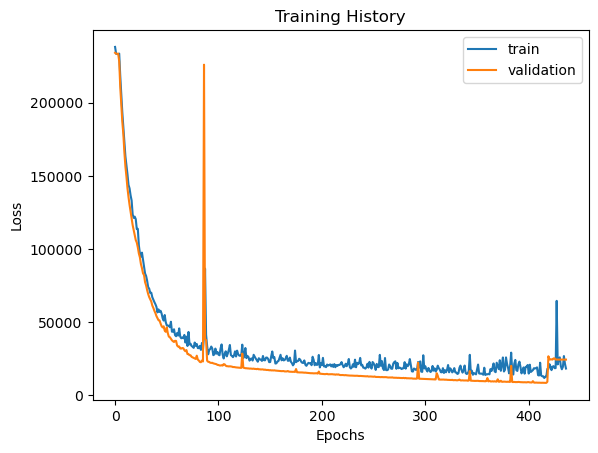

In [58]:
# Visualize training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training History')
plt.show()

In [78]:
# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

In [79]:
# Initialize lists to store scores for each fold
train_scores = []
val_scores = []

In [80]:
# Reset the index of y_train
y_train = y_train.reset_index(drop=True)

# Loop over each fold
for train_index, val_index in tscv.split(X_train_reshaped):
    # Split the data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X_train_reshaped[train_index], X_train_reshaped[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Clone the model to have the same architecture
    model_clone = clone_model(model_bpnnlstm)
    model_clone.compile(loss='mse', optimizer='adam', metrics=['mae', 'mape'])

    # Fit the model to the training data
    model_clone.fit(X_train_fold, y_train_fold, epochs=5000, batch_size=32, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stop, reduce_lr], verbose=1)

    # Evaluate the model on the training and validation data
    train_score = model_clone.evaluate(X_train_fold, y_train_fold)
    val_score = model_clone.evaluate(X_val_fold, y_val_fold)

    # Append the scores to the lists
    train_scores.append(train_score)
    val_scores.append(val_score)

Epoch 1/5000
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - loss: 215867.8125 - mae: 137.7499 - mape: 145.7202 - val_loss: 278265.9375 - val_mae: 140.0624 - val_mape: 407.0524 - learning_rate: 0.0010
Epoch 2/5000
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 228522.4688 - mae: 131.3012 - mape: 434.1020 - val_loss: 274211.2500 - val_mae: 147.2665 - val_mape: 617.5742 - learning_rate: 0.0010
Epoch 3/5000
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 201214.1250 - mae: 144.3695 - mape: 649.0345 - val_loss: 271695.4062 - val_mae: 155.0316 - val_mape: 785.3578 - learning_rate: 0.0010
Epoch 4/5000
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 177672.6250 - mae: 143.9581 - mape: 815.6584 - val_loss: 270214.3438 - val_mae: 161.7659 - val_mape: 909.5862 - learning_rate: 0.0010
Epoch 5/5000
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 196541.8281 - mae: 156.7941 - mape: 887.4706 - val_loss: 269145.5312 - val_mae: 168.3532 - val_mape: 1021.6628 - learning_rate: 0.0010
Epoch 6/5000
76/76 ━━━━━

In [81]:
# Print the average training and validation scores across all folds
print('Average training score:', np.mean(train_scores))
print('Average validation score:', np.mean(val_scores))

Average training score: 77152.41651814779
Average validation score: 79745.76208902994


In [53]:
# Make predictions
predictions = model_bpnnlstm.predict(X_test_reshaped)

97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [54]:
# Predictions on the test set actual and predicted values
predictions = predictions.flatten()
actual = y_test.reset_index(drop=True)

# Print the first 50 actual and predicted values and round them off to whole numbers
for i in range(50):
    print(f'Actual: {actual[i]}, Predicted: {round(predictions[i])}')

Actual: 93, Predicted: 94
Actual: 16, Predicted: 25
Actual: 1017, Predicted: 1016
Actual: 75, Predicted: 73
Actual: 52, Predicted: 51
Actual: 59, Predicted: 58
Actual: 60, Predicted: 58
Actual: 84, Predicted: 83
Actual: 250, Predicted: 238
Actual: 20, Predicted: 20
Actual: 20, Predicted: 21
Actual: 13, Predicted: 12
Actual: 14, Predicted: 9
Actual: 67, Predicted: 67
Actual: 12, Predicted: 11
Actual: 32, Predicted: 32
Actual: 515, Predicted: 504
Actual: 380, Predicted: 377
Actual: 8, Predicted: 8
Actual: 20, Predicted: 20
Actual: 4, Predicted: 7
Actual: 4, Predicted: 8
Actual: 37, Predicted: 39
Actual: 46, Predicted: 46
Actual: 11, Predicted: 8
Actual: 119, Predicted: 118
Actual: 9, Predicted: 8
Actual: 3, Predicted: 6
Actual: 7, Predicted: 8
Actual: 57, Predicted: 56
Actual: 105, Predicted: 104
Actual: 1125, Predicted: 1109
Actual: 58, Predicted: 58
Actual: 78, Predicted: 75
Actual: 5, Predicted: 6
Actual: 4, Predicted: 2
Actual: 42, Predicted: 39
Actual: 18, Predicted: 14
Actual: 26, 

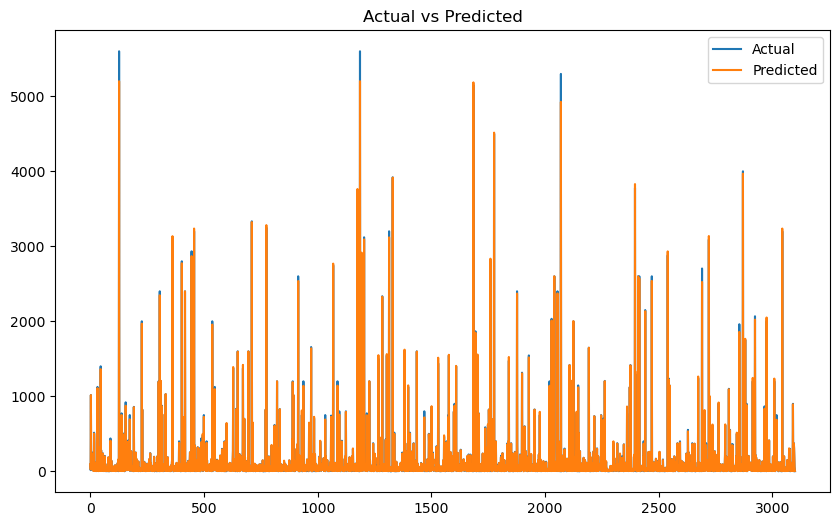

In [55]:
# Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [61]:
# Evaluate the model performance
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)


print(f'Test Loss: {loss[0]}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Test Loss: 224.36793518066406
Mean Absolute Error (MAE): 4.012468201465969
R-squared (R2): 0.9986840150485565
Mean Absolute Percentage Error (MAPE): 29.072958757849744
Mean Squared Error (MSE): 224.57097826588063
Root Mean Squared Error (RMSE): 14.98569245199836


In [84]:
# Evaluate the model performance
mae = mean_absolute_error(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)


print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 4.012468201465969
Mean Absolute Percentage Error (MAPE): 29.072958757849744
Mean Squared Error (MSE): 224.57097826588063
Root Mean Squared Error (RMSE): 14.98569245199836


In [59]:
# Save the model as json file
model_json = model_bpnnlstm.to_json()
with open('/Users/amalshar/Desktop/ForecaStory-FinalYearProject/Model Implementation/Models/bpnn_lstm_model.json', 'w') as json_file:
    json_file.write(model_json)

In [60]:
# Save the model weights
model_bpnnlstm.save_weights('/Users/amalshar/Desktop/ForecaStory-FinalYearProject/Model Implementation/Models/bpnn_lstm_model.weights.h5')

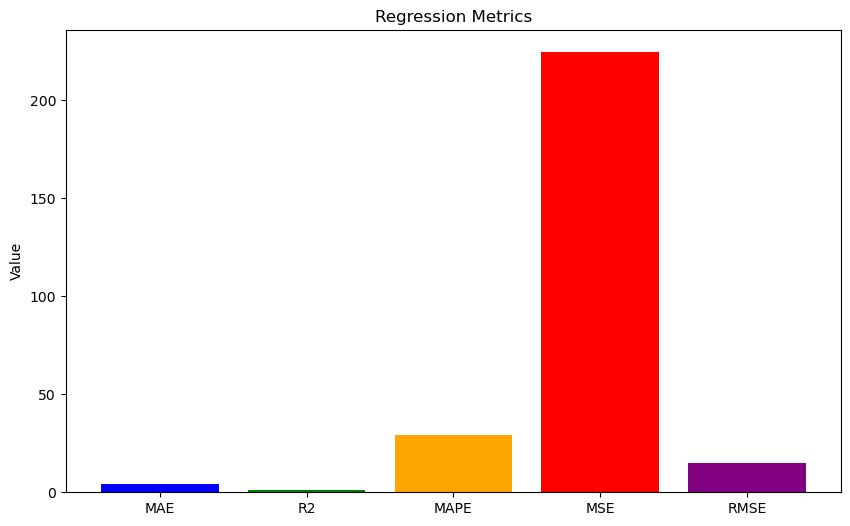

In [62]:
# Plotting regression metrics
labels = ['MAE', 'R2', 'MAPE', 'MSE', 'RMSE']
values = [mae, r2, mape, mse, rmse]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Regression Metrics')
plt.ylabel('Value')
plt.show()

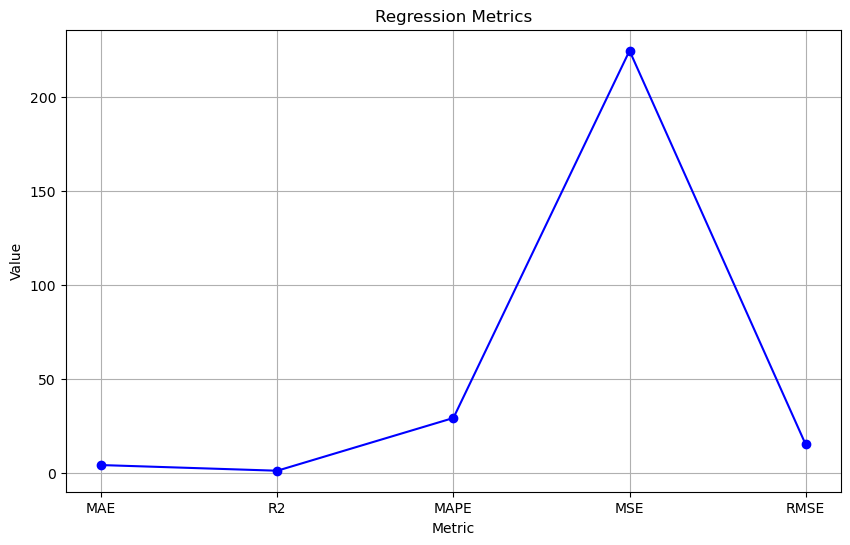

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(labels, values, marker='o', color='b', linestyle='-')
plt.title('Regression Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.grid(True)
plt.show()

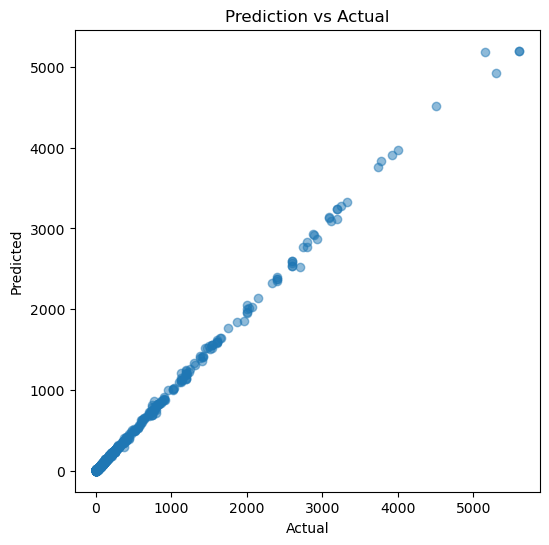

In [64]:
# Prediction vs Actual Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Prediction vs Actual')
plt.show()

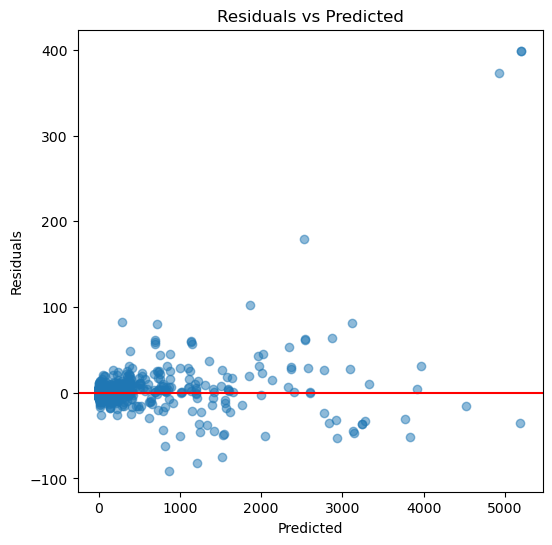

In [65]:
# Residuals Plot
residuals = y_test - predictions
plt.figure(figsize=(6,6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

/Users/amalshar/miniforge3/envs/tensorflow_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


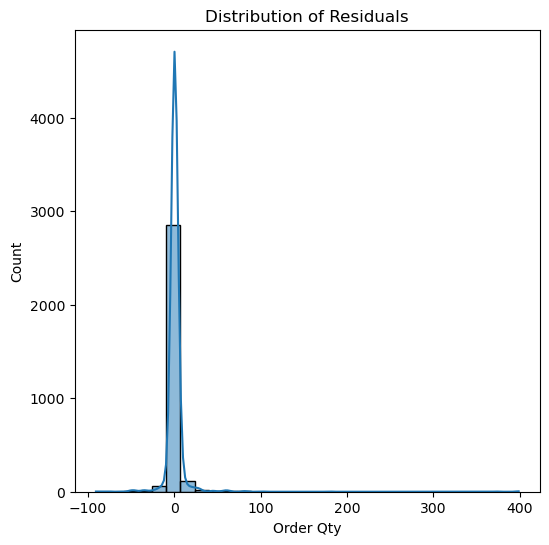

In [66]:
# Distribution of Residuals Plot
plt.figure(figsize=(6,6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.show()

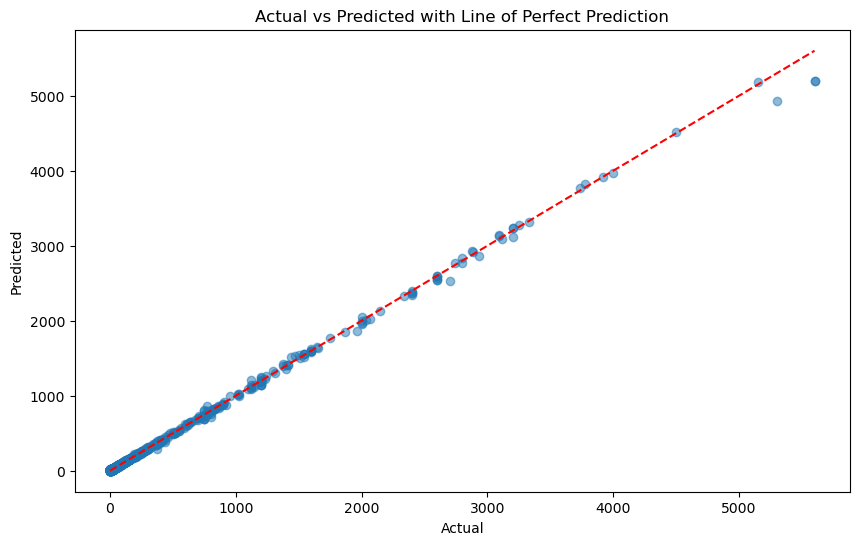

In [67]:
# Scatter Plot of Actual vs Predicted with Line of Perfect Prediction
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted with Line of Perfect Prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [70]:
from tensorflow.keras.models import model_from_json

# Load the model
json_file = open('/Users/amalshar/Desktop/ForecaStory-FinalYearProject/Model Implementation/Models/bpnn_lstm_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

# Load model weights
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("/Users/amalshar/Desktop/ForecaStory-FinalYearProject/Model Implementation/Models/bpnn_lstm_model.weights.h5")

In [71]:
# Calculate the lower and upper bounds as 10% below and above the predicted demand
lower_bound = predictions * 0.9
upper_bound = predictions * 1.1

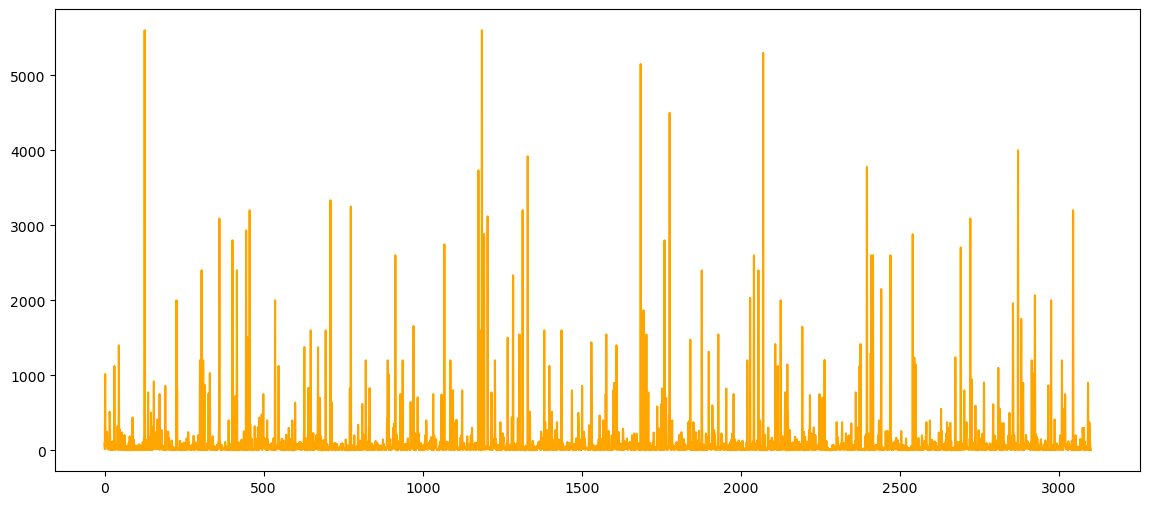

In [72]:
# Plot the actual demand
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label='Actual Demand', color='orange')

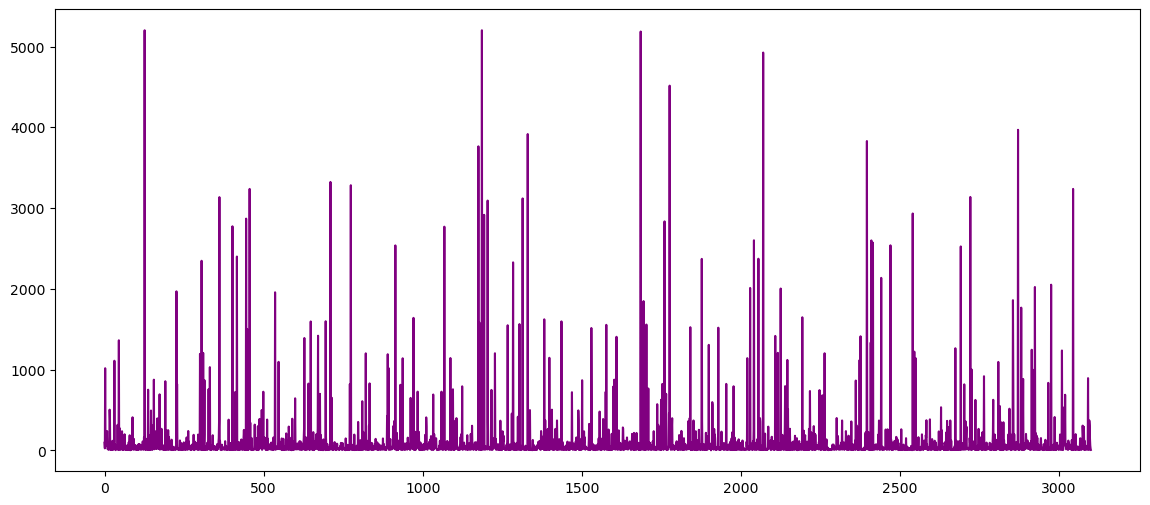

In [73]:
# Plot the predicted demand
plt.figure(figsize=(14, 6))
plt.plot(predictions, label='Predicted Demand', color='purple')

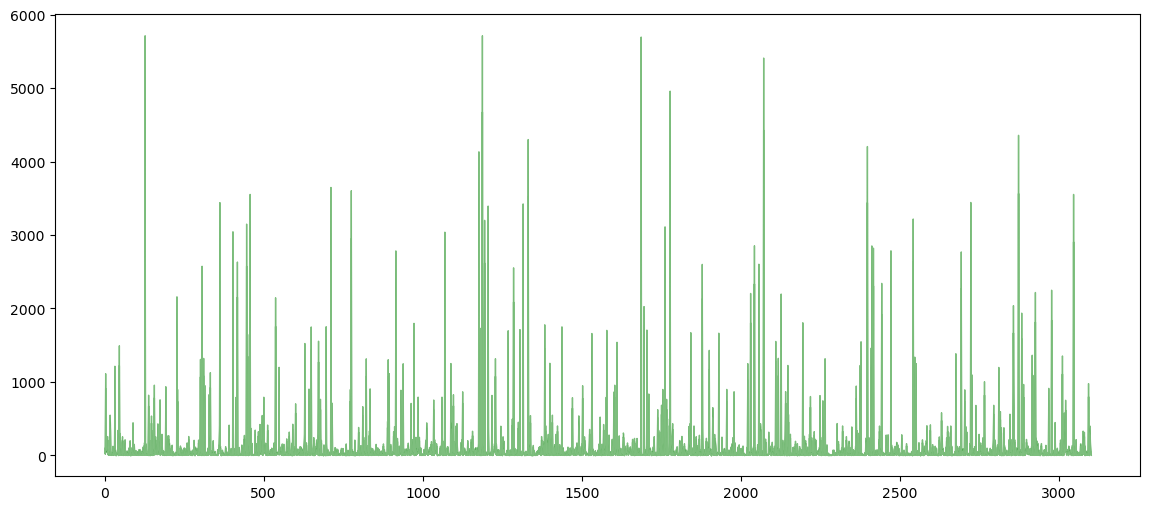

In [74]:
# Fill the area between the lower and upper bounds
plt.figure(figsize=(14, 6))
plt.fill_between(range(len(lower_bound)), lower_bound, upper_bound, color='green', alpha=0.5, label='Predicted Bounds')

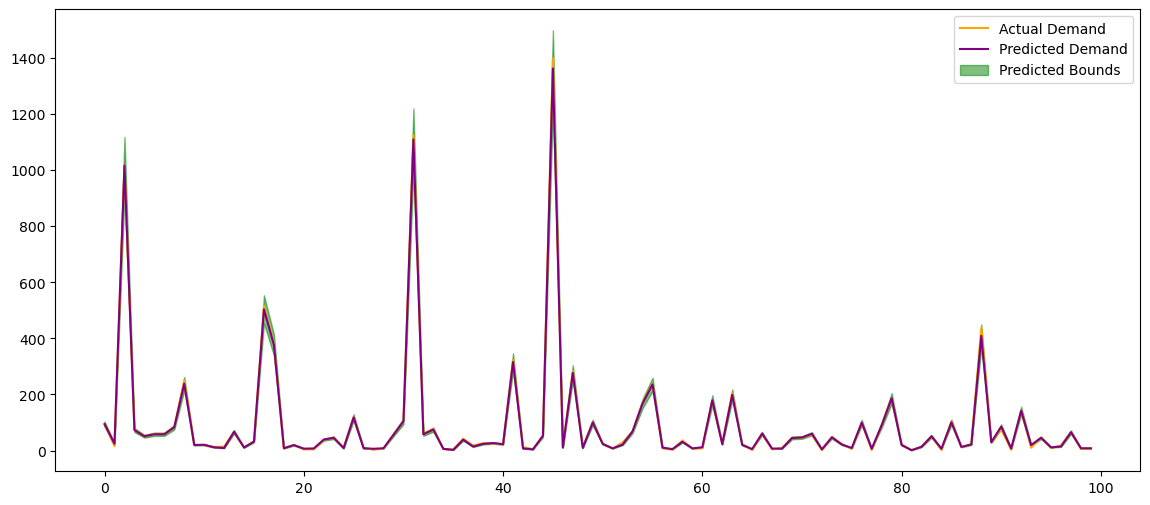

In [75]:
# Plot the first 100 actual and predicted values for better visibility
plt.figure(figsize=(14, 6))
plt.plot(y_test.values[:100], label='Actual Demand', color='orange')
plt.plot(predictions[:100], label='Predicted Demand', color='purple')
plt.fill_between(range(100), lower_bound[:100], upper_bound[:100], color='green', alpha=0.5, label='Predicted Bounds')
plt.legend()
plt.show()